#Credito

## Carregar base de Dados

In [1]:
# Importação dos pacotes
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Seed para reprodução de resultados
seed = 1
random.seed(seed)
np.random.seed(seed)

In [2]:
data = pd.read_table('credito.txt')
data.head()

,ESTC,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
0,1,0,360,0,313,9,52,0,25,48,0,1
1,0,0,350,1,468,10,65,0,33,6,0,1
2,0,0,1100,0,829,9,125,0,56,48,0,1
3,0,0,3000,0,552,12,76,1,31,60,0,1
4,1,0,1000,0,809,12,111,0,24,7,0,1


In [3]:
data.shape

(2077, 12)

In [4]:
data.describe()

,ESTC,NDEP,RENDA,TIPOR,VBEM,NPARC,VPARC,TEL,IDADE,RESMS,ENTRADA,CLASSE
count,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000,2077.000000
mean,0.521907,0.122292,969.541647,0.447280,563.794415,8.395282,102.666346,0.128069,41.204622,30.901300,30.664420,0.474723
std,0.674420,0.556507,897.707359,0.497333,292.360830,3.614923,64.315987,0.334247,13.276082,51.960972,93.356164,0.499481
min,0.000000,0.000000,300.000000,0.000000,300.000000,1.000000,50.000000,0.000000,18.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,470.000000,0.000000,404.000000,6.000000,66.000000,0.000000,31.000000,6.000000,0.000000,0.000000
50%,0.000000,0.000000,640.000000,0.000000,489.000000,10.000000,83.000000,0.000000,39.000000,6.000000,0.000000,0.000000
75%,1.000000,0.000000,1150.000000,1.000000,618.000000,10.000000,118.000000,0.000000,52.000000,48.000000,0.000000,1.000000
max,3.000000,7.000000,9675.000000,1.000000,6000.000000,24.000000,719.000000,1.000000,70.000000,420.000000,1300.000000,1.000000


## Separar base em treino e teste

In [5]:
from sklearn.model_selection import train_test_split 
# Agora usaremos a função para fazer de fato a separação. Já faremos a separação em treino e teste e entrada e saída.
X = data.loc[:,data.columns != 'CLASSE']  # Entrada
y = data.CLASSE    # Saída
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [6]:
y.value_counts()

0    1091
1     986
Name: CLASSE, dtype: int64

In [7]:
# Verificar proporção para teste para confirmar amostragem estratificada
print(0.2*data.CLASSE.value_counts()[0])
print(0.2*data.CLASSE.value_counts()[1])

218.20000000000002
197.20000000000002


In [8]:
y_test.value_counts()

0    219
1    197
Name: CLASSE, dtype: int64

In [9]:
y_train.value_counts()

0    872
1    789
Name: CLASSE, dtype: int64

In [10]:
# Vamos olhar os shapes da bases de treino e teste
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1661, 11)
(416, 11)
(1661,)
(416,)


##Machine Learning

In [11]:
# treinar modelo
from sklearn.tree import DecisionTreeClassifier

def train(X_train, y_train, seed):
  model = DecisionTreeClassifier(min_samples_leaf=5, random_state=seed) # tente mudar parâmetro para evitar overfitting
  model.fit(X_train, y_train);
  return model

model = train(X_train, y_train, seed)

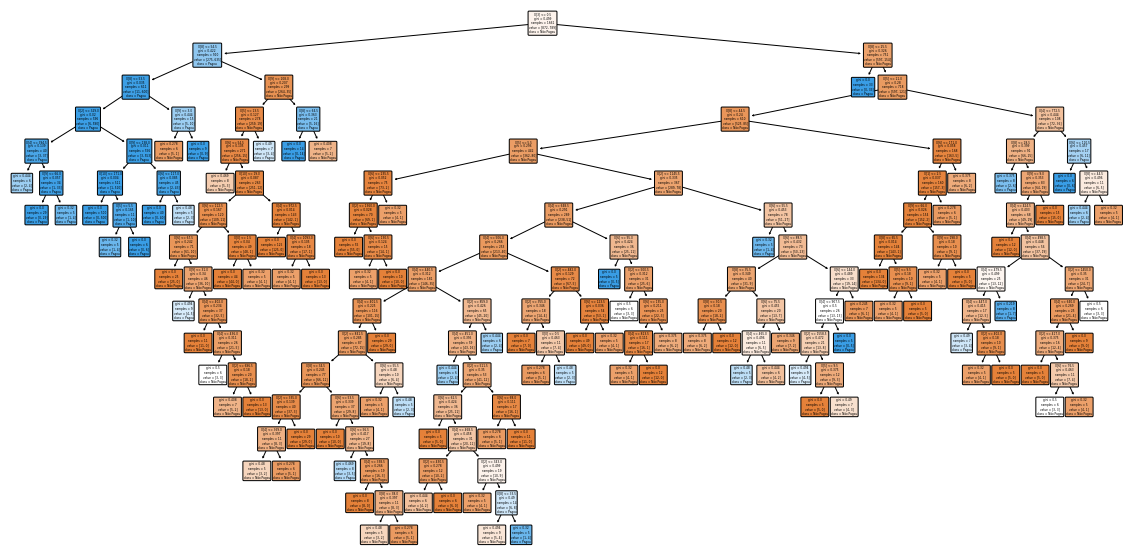

In [12]:
# Visualização gráfica da árvore de decisão
from sklearn import tree
fig, ax = plt.subplots(figsize=(20, 10)) # Definir tamanho da imagem a ser gerada
tree.plot_tree(model, class_names=['Não Pagou', 'Pagou'], filled=True, rounded=True); # plota a árvore

### Avaliar modelo treinado na base de teste

Acurácia:  0.875
Kappa:  0.7494266187883702
F1:  0.8686868686868686


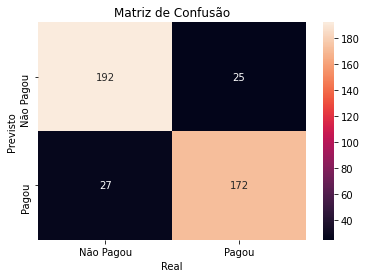

In [13]:
def predict_and_evaluate(X_test, y_test):

  y_pred = model.predict(X_test) #inferência do teste

  # Acurácia
  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_test, y_pred)
  print('Acurácia: ', accuracy)

  # Kappa
  from sklearn.metrics import cohen_kappa_score
  kappa = cohen_kappa_score(y_test, y_pred)
  print('Kappa: ', kappa)

  # F1
  from sklearn.metrics import f1_score
  f1 = f1_score(y_test, y_pred)
  print('F1: ', f1)

  # Matriz de confusão
  from sklearn.metrics import confusion_matrix
  confMatrix = confusion_matrix(y_pred, y_test)

  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f")
  plt.xlabel('Real')
  plt.ylabel('Previsto')
  plt.title('Matriz de Confusão')

  # Colocar os nomes
  ax.xaxis.set_ticklabels(['Não Pagou', 'Pagou']) 
  ax.yaxis.set_ticklabels(['Não Pagou', 'Pagou'])
  plt.show()

predict_and_evaluate(X_test, y_test)

###Normalizar

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Acurácia:  0.875
Kappa:  0.7494266187883702
F1:  0.8686868686868686


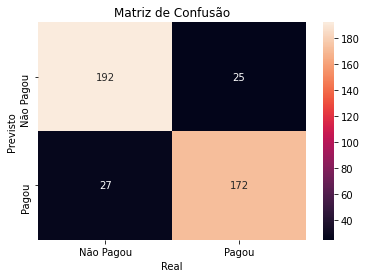

In [15]:
# Treinar e Testar novamente
model = train(X_train, y_train, seed)
predict_and_evaluate(X_test, y_test)

##Grid Search

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
# Set the parameters by cross-validation
tuned_parameters = [{'criterion': ['gini', 'entropy'], 'max_depth': [2,4,6,8,10,12],
                     'min_samples_leaf': [1, 2, 3, 4, 5, 8, 10]}]

print("# Tuning hyper-parameters for F1 score")
print()

model = GridSearchCV(DecisionTreeClassifier(), tuned_parameters, scoring='f1')
model.fit(X_train, y_train)

y_true, y_pred = y_test, model.predict(X_test)
print(classification_report(y_true, y_pred))
print()

# Tuning hyper-parameters for F1 score

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       219
           1       0.96      0.83      0.89       197

    accuracy                           0.90       416
   macro avg       0.91      0.90      0.90       416
weighted avg       0.91      0.90      0.90       416




Acurácia:  0.9038461538461539
Kappa:  0.8057663125948407
F1:  0.8907103825136613


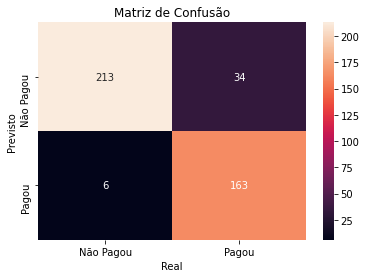

In [17]:
predict_and_evaluate(X_test, y_test)

In [18]:
model.best_params_

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 8}

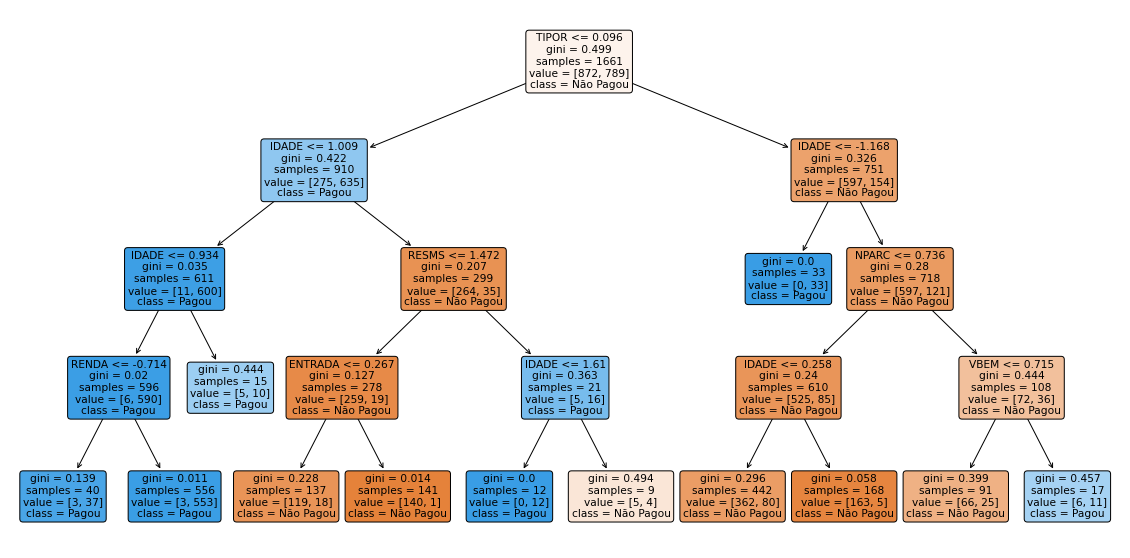

In [19]:
fig, ax = plt.subplots(figsize=(20, 10)) # Definir tamanho da imagem a ser gerada
tree.plot_tree(model.best_estimator_, class_names=['Não Pagou', 'Pagou'], 
               filled=True, rounded=True, feature_names=data.columns);